In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

In [2]:
file_path = "data/climate_videos_new.jsonl"
climate_videos_df = pd.read_json(file_path, lines=True)

count_file_path = "data/nb_videos_by_date.jsonl"
climate_videos_count_df = pd.read_json(count_file_path, lines=True)

# Convert the upload_date column to datetime and set as index

In [3]:
data = climate_videos_df.copy()
data['upload_date'] = pd.to_datetime(climate_videos_df['upload_date'])
data = data.set_index('upload_date')
data.sort_index(inplace=True)

data_count = climate_videos_count_df.copy()
data_count.columns = ['upload_date', 'count']
data_count.set_index('upload_date', inplace=True)
data_count.index = pd.to_datetime(data_count.index)
data_count.sort_index(inplace=True)
data_count['views'] = 100000

data = data['2016-01-01':'2019-08-01']
data_count = data_count['2016-01-01':'2019-08-01']

In [4]:
data.dropna(inplace=True) # Drop missing values
data.count()

categories       86423
channel_id       86423
crawl_date       86423
description      86423
dislike_count    86423
display_id       86423
duration         86423
like_count       86423
tags             86423
title            86423
view_count       86423
dtype: int64

# Compute the ratio video count and views over time  

In [5]:
# Get video count and views per day
count_per_day = data.groupby(data.index)['view_count'].count()
views_per_day = data.groupby(data.index)['view_count'].sum()

# Compute the ratio with respect to the total number of videos and views
count_per_day = count_per_day / data_count['count'] * 100
views_per_day = views_per_day / data_count['views'] * 100

# Plot number of videos and views over time 

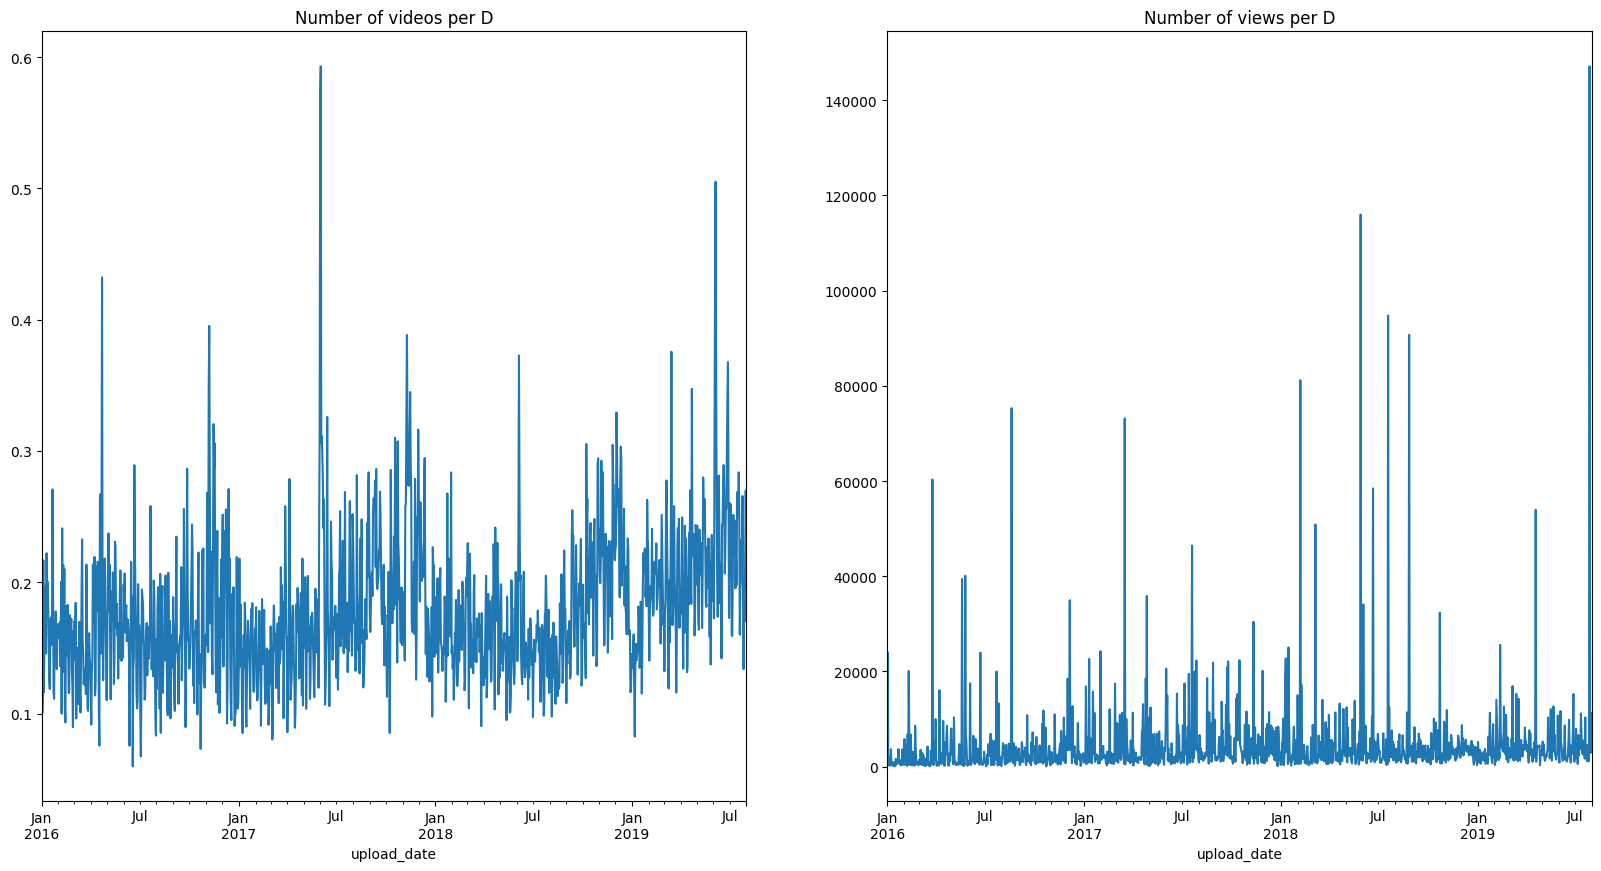

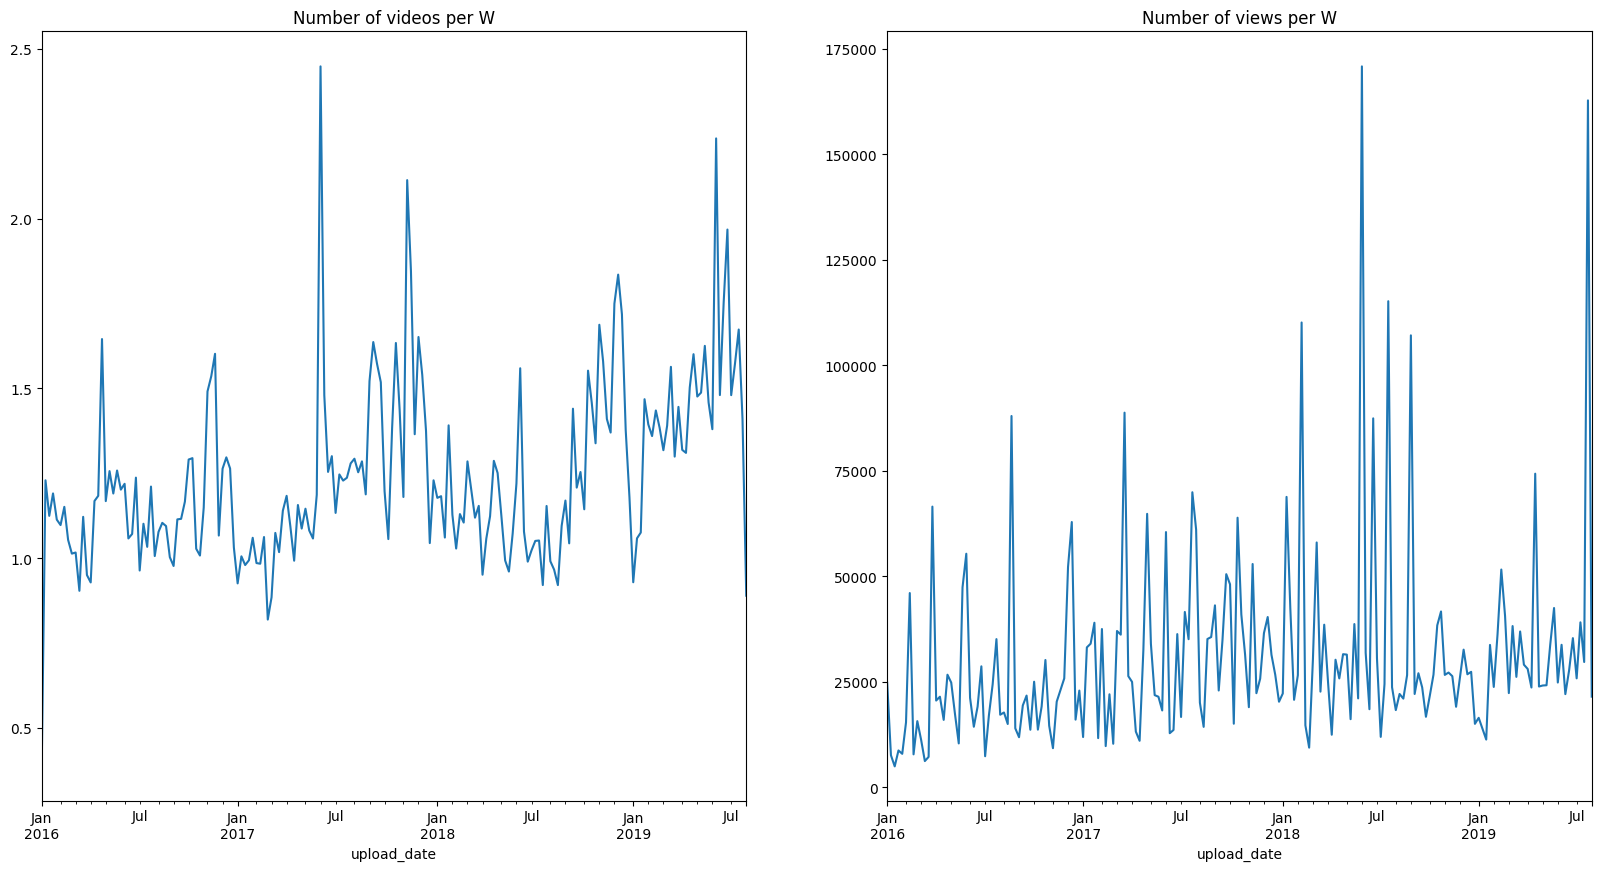

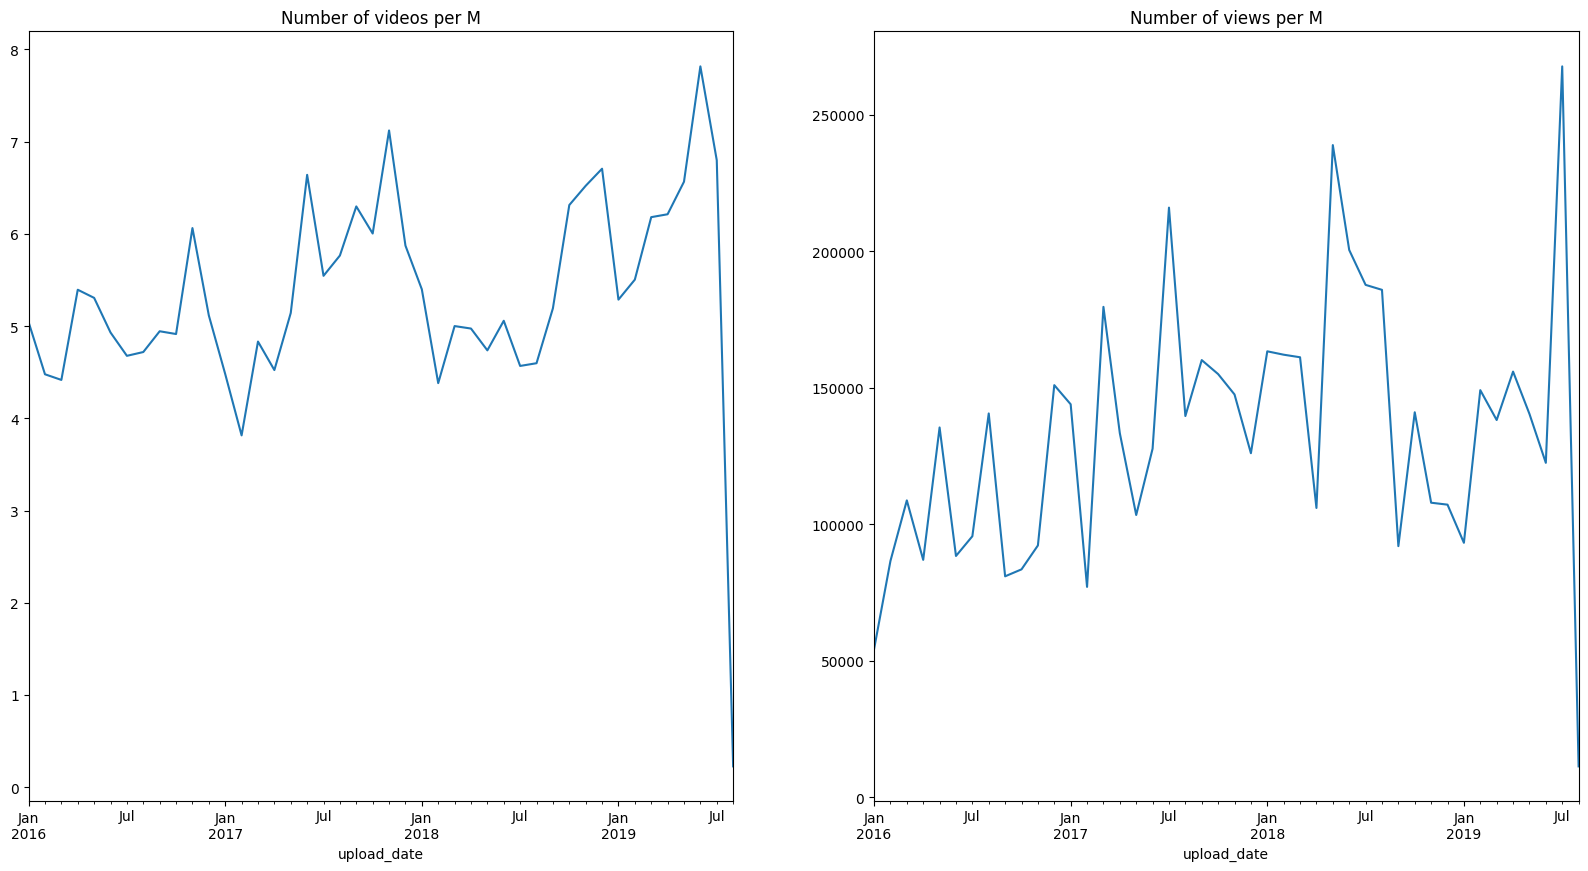

In [6]:
# Create count per month and count per week
count_per_month = count_per_day.resample('M').sum()
count_per_week = count_per_day.resample('W').sum()

# Create views per month and views per week
views_per_month = views_per_day.resample('M').sum()
views_per_week = views_per_day.resample('W').sum()

# Aggregate the views and counts per day, week and month
sample_rate = ['D', 'W', 'M']
counts = [count_per_day, count_per_week, count_per_month]
views = [views_per_day, views_per_week, views_per_month]

# Plot the counts and views for each sample rate
for i in range(3):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    counts[i].plot(ax=ax[0], title=f'Number of videos per {sample_rate[i]}')
    views[i].plot(ax=ax[1], title=f'Number of views per {sample_rate[i]}')

In [7]:
# Extract maximum counts and view per week 
sorted_counts = count_per_day.sort_values(ascending=False)
sorted_views = views_per_day.sort_values(ascending=False)

# Print the results
amount = 4
print(f'The maximum number of videos per week is\n{sorted_counts[:amount]}\n')
print(f'The maximum number of views per week is\n{sorted_views[:amount]}')

The maximum number of videos per week is
upload_date
2017-06-02    0.592940
2017-06-01    0.566819
2019-06-05    0.505029
2016-04-22    0.432190
dtype: float64

The maximum number of views per week is
upload_date
2019-07-28    147116.397
2018-05-29    115969.415
2018-07-19     94767.062
2018-08-27     90699.471
dtype: float64
